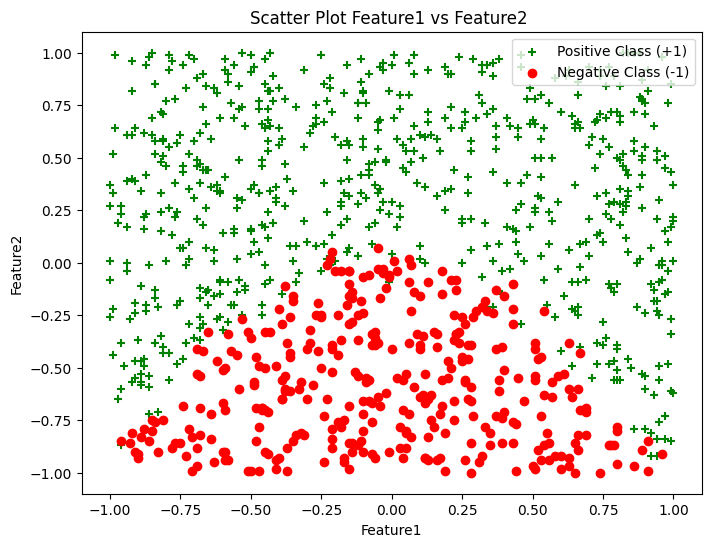

Intercept : 1.4177285446715542
Coefficient for Feature1: 0.11776950188296606
Coefficient for Feature2: 4.526874527567941


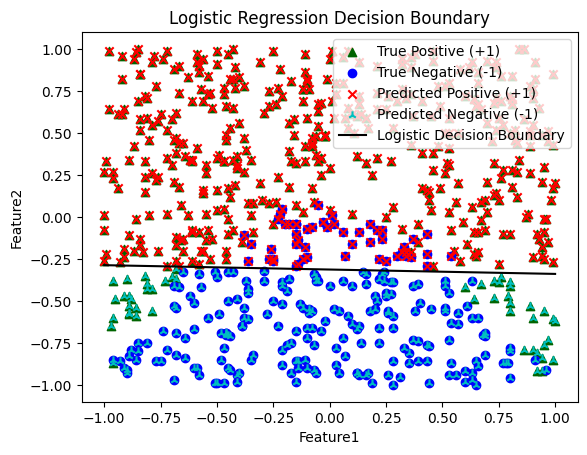

Training Accuracy (Logistic Regression): 0.8583690987124464
Testing Accuracy (Logistic Regression): 0.8666666666666667
SVM Model with C=0.001:
Model Coefficient (w): [[0.00427446 0.37862055]]
Model Intercept (b): [0.16516569]


SVM Model with C=1:
Model Coefficient (w): [[0.04884135 1.67371815]]
Model Intercept (b): [0.51242375]


SVM Model with C=100:
Model Coefficient (w): [[0.04962784 1.69465536]]
Model Intercept (b): [0.51999177]




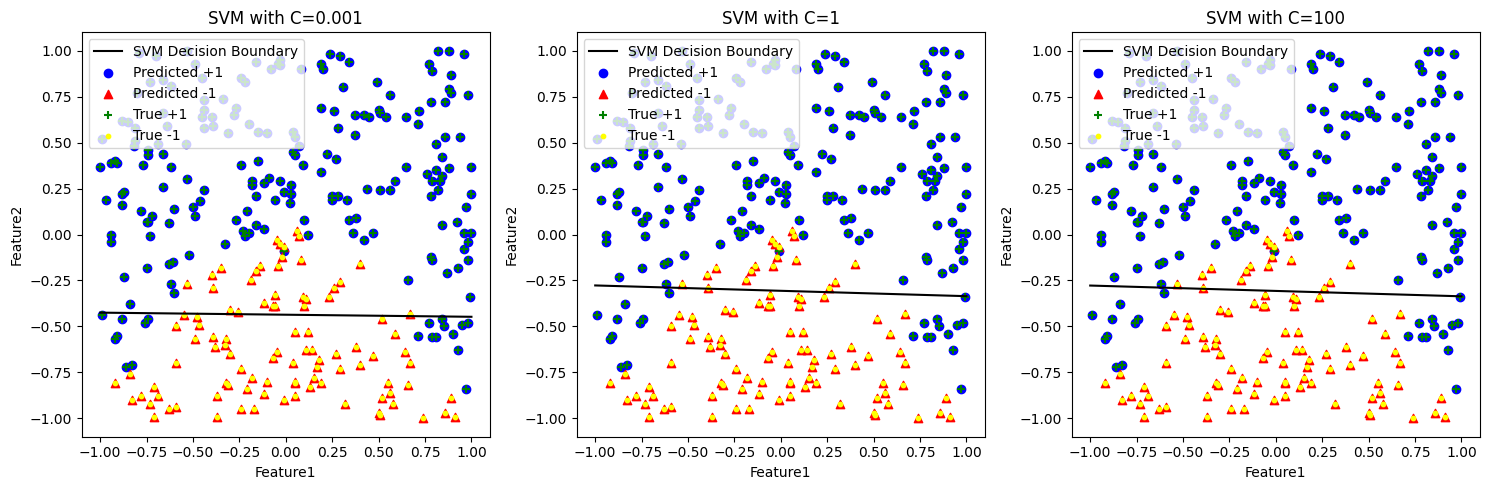

SVM with C=0.001: Test Accuracy = 0.84
SVM with C=1: Test Accuracy = 0.8666666666666667
SVM with C=100: Test Accuracy = 0.8666666666666667


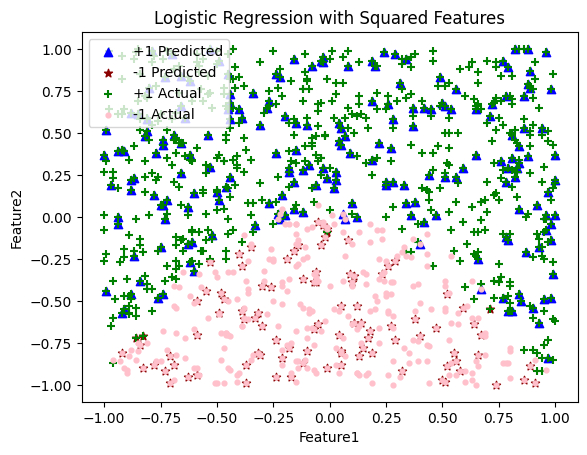

Accuracy of Logistic Regression with squared features: 0.9733333333333334
Baseline Accuracy: 0.64


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
dataset = pd.read_csv('/content/Week2.csv', names=['feature1', 'feature2', 'target'])

# Extract the features and the target labels
feat1 = dataset['feature1']
feat2 = dataset['feature2']
features = np.column_stack((feat1, feat2))
target = dataset['target']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
# A
#(i) Visualize the data with scatter plots
positive_samples = dataset[dataset['target'] == 1]
negative_samples = dataset[dataset['target'] == -1]

plt.figure(figsize=(8, 6))
plt.scatter(positive_samples['feature1'], positive_samples['feature2'], marker='+', label='Positive Class (+1)', c='g')
plt.scatter(negative_samples['feature1'], negative_samples['feature2'], marker='o', label='Negative Class (-1)', c='r')
plt.title('Scatter Plot Feature1 vs Feature2 ')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

#(ii) Logistic Regression Model Training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on both training and test datasets
test_predictions = logistic_model.predict(X_test)
train_predictions = logistic_model.predict(X_train)

# Extract model coefficients
intercept_lr = logistic_model.intercept_[0]
coeff_feat1 = logistic_model.coef_[0][0]
coeff_feat2 = logistic_model.coef_[0][1]

print("Intercept :", intercept_lr)
print("Coefficient for Feature1:", coeff_feat1)
print("Coefficient for Feature2:", coeff_feat2)

#(iii) Plot training data and decision boundary for Logistic Regression
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], marker='^', label='True Positive (+1)', c='darkgreen')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], marker='o', label='True Negative (-1)', c='b')
plt.scatter(X_train[train_predictions == 1, 0], X_train[train_predictions == 1, 1], marker='x', label='Predicted Positive (+1)', c='r')
plt.scatter(X_train[train_predictions == -1, 0], X_train[train_predictions == -1, 1], marker='2', label='Predicted Negative (-1)', c='c')

# Plot decision boundary for logistic regression
feat1_range = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
feat2_range = -(intercept_lr + coeff_feat1 * feat1_range) / coeff_feat2
plt.plot(feat1_range, feat2_range, 'k-', label='Logistic Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(loc="upper right")
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Logistic Regression Model Accuracy
training_accuracy = accuracy_score(y_train, train_predictions)
testing_accuracy = accuracy_score(y_test, test_predictions)
print(f"Training Accuracy (Logistic Regression): {training_accuracy}")
print(f"Testing Accuracy (Logistic Regression): {testing_accuracy}")

# B
#(i) SVM Model Training for multiple C values
penalty_values = [0.001, 1, 100]
svm_models_collection = {}

for penalty in penalty_values:
    svm_model = LinearSVC(C=penalty, random_state=42, max_iter=10000)
    svm_model.fit(X_train, y_train)
    svm_models_collection[penalty] = svm_model

    print(f"SVM Model with C={penalty}:")
    print("Model Coefficient (w):", svm_model.coef_)
    print("Model Intercept (b):", svm_model.intercept_)
    print("\n")

# Function to get the second feature value based on the decision boundary
def compute_decision_boundary(feat1_values, trained_model):
    return -(trained_model.coef_[0][0] * feat1_values + trained_model.intercept_) / trained_model.coef_[0][1]

#(ii) Plot SVM Decision Boundaries for each C value
svm_models = [LinearSVC(C=0.001, max_iter=10000), LinearSVC(C=1, max_iter=10000), LinearSVC(C=100, max_iter=10000)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, svm_model in enumerate(svm_models):
    svm_model.fit(X_train, y_train)
    predicted_svm = svm_model.predict(X_test)

    positive_test = X_test[y_test == 1]
    negative_test = X_test[y_test == -1]

    # Plot SVM Decision Boundary
    boundary_feat1 = np.linspace(-1.0, 1.0, 100)
    boundary_feat2 = compute_decision_boundary(boundary_feat1, svm_model)
    axes[idx].plot(boundary_feat1, boundary_feat2, color='black', label='SVM Decision Boundary')

    # Plot test points
    axes[idx].scatter(positive_test[:, 0], positive_test[:, 1], marker='o', color='blue', label='Predicted +1')
    axes[idx].scatter(negative_test[:, 0], negative_test[:, 1], marker='^', color='red', label='Predicted -1')
    axes[idx].scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], marker='+', color='green', label='True +1')
    axes[idx].scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], marker='o', color='yellow', label='True -1', s=10)

    axes[idx].legend(loc='upper left')
    axes[idx].set_title(f"SVM with C={penalty_values[idx]}")
    axes[idx].set_xlabel('Feature1')
    axes[idx].set_ylabel('Feature2')

plt.tight_layout()
plt.show()

# Calculate accuracy for each SVM model
for idx, penalty in enumerate(penalty_values):
    svm_predictions = svm_models_collection[penalty].predict(X_test)
    accuracy_svm = accuracy_score(y_test, svm_predictions)
    print(f"SVM with C={penalty}: Test Accuracy = {accuracy_svm}")
# C
#(i) Logistic Regression with Additional Squared Features
f1_train = X_train[:, 0]
f2_train = X_train[:, 1]
X_train_extended = np.column_stack((f1_train, f2_train, f1_train ** 2, f2_train ** 2))
log_model_extended = LogisticRegression()
log_model_extended.fit(X_train_extended, y_train)

# Preparing test data with squared features
X_test_extended = np.column_stack((X_test[:, 0], X_test[:, 1], X_test[:, 0] ** 2, X_test[:, 1] ** 2))
predictions_extended = log_model_extended.predict(X_test_extended)

# Plotting Logistic Regression with additional squared features
plt.scatter(X_test_extended[predictions_extended == 1, 0], X_test_extended[predictions_extended == 1, 1], marker='^', color='blue', label='+1 Predicted')
plt.scatter(X_test_extended[predictions_extended == -1, 0], X_test_extended[predictions_extended == -1, 1], marker='*', color='darkred', label='-1 Predicted')
plt.scatter(dataset[dataset['target'] == 1]['feature1'], dataset[dataset['target'] == 1]['feature2'], marker='+', color='green', label='+1 Actual')
plt.scatter(dataset[dataset['target'] == -1]['feature1'], dataset[dataset['target'] == -1]['feature2'], marker='o', color='pink', s=12, label='-1 Actual')

plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend(loc=2)
plt.title("Logistic Regression with Squared Features")
plt.show()

# Accuracy for Logistic Regression with additional features
accuracy_extended = accuracy_score(y_test, predictions_extended)
print(f"Accuracy of Logistic Regression with squared features: {accuracy_extended}")

# Baseline Model Comparison
common_class = y_train.mode()[0]
baseline_prediction = np.full(y_train.shape, common_class)
baseline_accuracy = accuracy_score(y_train, baseline_prediction)

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")




